## 回帰分析の概念
(https://qiita.com/kenmatsu4/items/8b4e908d7c93d046110d)
- [データセット car.csv](https://www.dropbox.com/s/bjmd4g22ubxxrgn/cars.csv?dl=0)  
車のスピードと、そのスピードでの停止距離

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

data = pd.read_csv('cars.csv', index_col=0)
data.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [14]:
# データ変換 : 1feet = 0.3408meter, 1mph = 1.61km/h
data['speed'] = data['speed'].map(lambda x: x * 1.61)
data['dist'] = data['dist'].map(lambda x: x * 0.34048)
data.head()

,speed,dist
1,6.44,0.68096
2,6.44,3.40480
3,11.27,1.36192
4,11.27,7.49056
5,12.88,5.44768


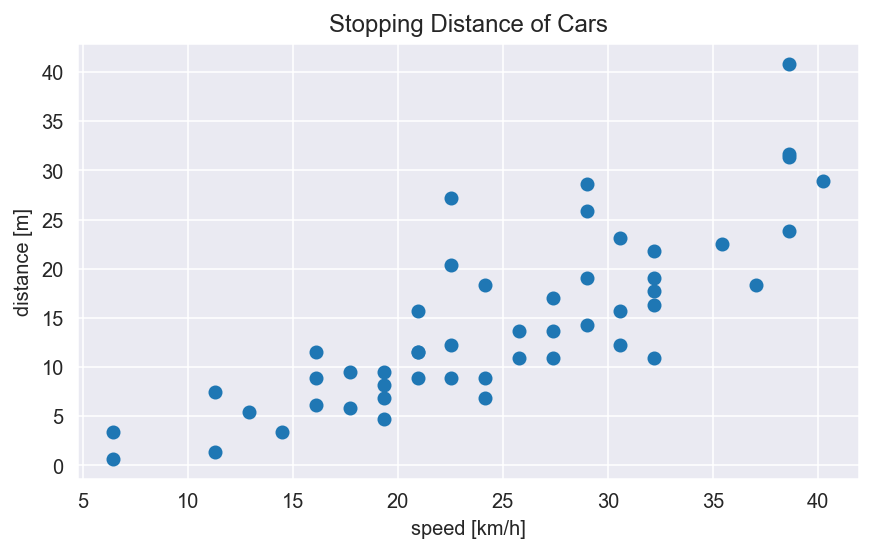

In [15]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.set_title('Stopping Distance of Cars')
ax.set_xlabel('speed [km/h]')
ax.set_ylabel('distance [m]')
plt.scatter(data['speed'], data['dist'])
plt.show()

## 回帰分析
**y = αx + β** で表せるような場合、単回帰分析（変数が一つ:x）

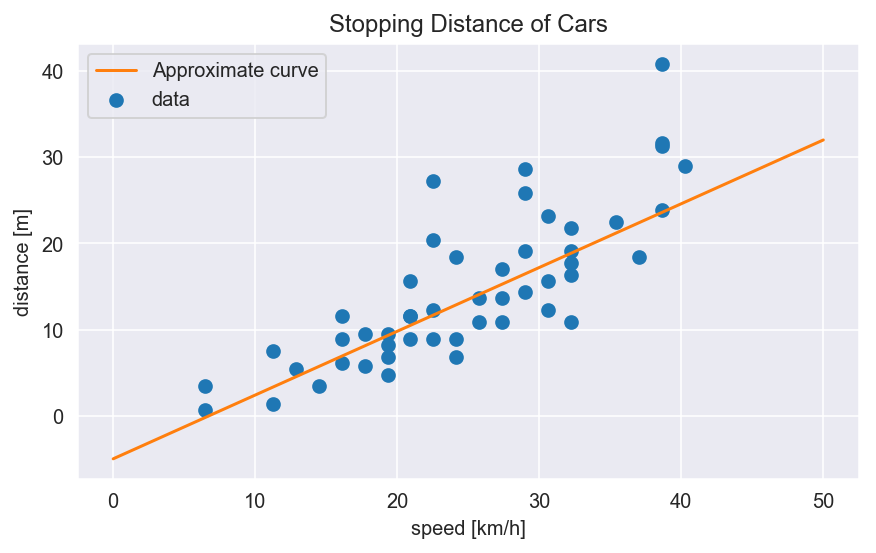

In [33]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.set_title('Stopping Distance of Cars')
ax.set_xlabel('speed [km/h]')
ax.set_ylabel('distance [m]')
plt.scatter(data['speed'], data['dist'], label='data', s=40)

x = [0, 50]
y = [-5, 32]
plt.plot(x, y, color='tab:orange', label='Approximate curve')

plt.legend()
plt.show()

## 最小二乗法 (Least squares method)
近似した直線と実際のデータとの誤差を最小化する。図中の直線の合計が最も小さくなるように。

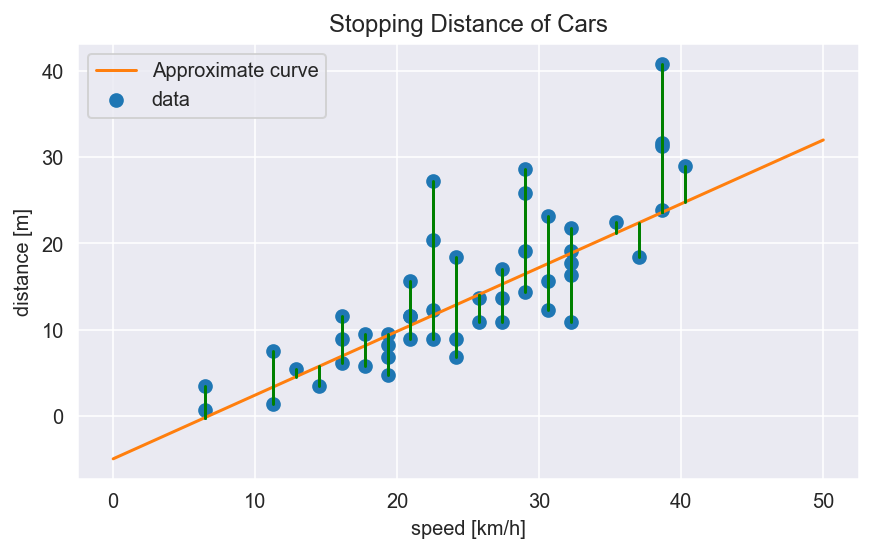

In [45]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

ax.set_title('Stopping Distance of Cars'); ax.set_xlabel('speed [km/h]'); ax.set_ylabel('distance [m]')
plt.scatter(data['speed'], data['dist'], label='data', s=40)

plt.plot(x, y, color='tab:orange', label='Approximate curve')

for d in data.values:
    plt.plot([d[0], d[0]], # x座標
             [d[1], d[0] * 0.74-5], # y座標 (y=0.74x-5)
             'green')

plt.legend()
plt.show()

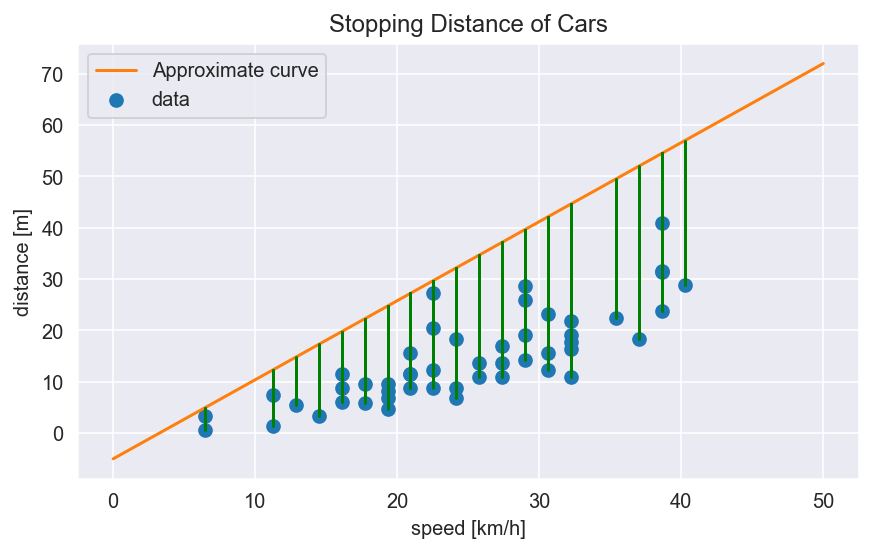

In [48]:
# α を変えてみる
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

ax.set_title('Stopping Distance of Cars'); ax.set_xlabel('speed [km/h]'); ax.set_ylabel('distance [m]')
plt.scatter(data['speed'], data['dist'], label='data', s=40)

x, y = [0, 50], [-5, 72]
plt.plot(x, y, color='tab:orange', label='Approximate curve')

for d in data.values:
    plt.plot([d[0], d[0]], # x座標
             [d[1], d[0] * 1.54-5], # y座標 (y=1.54x-5)
             'green')

plt.legend()
plt.show()

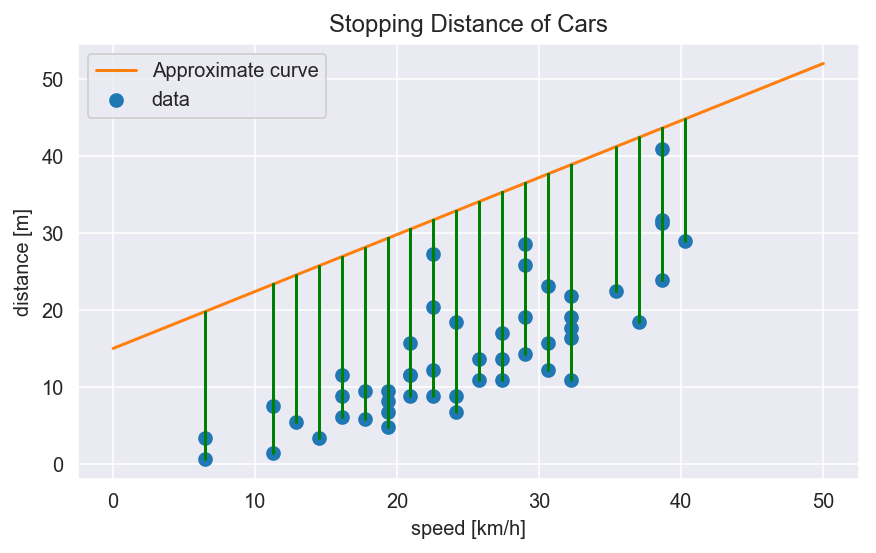

In [49]:
# β を変えてみる
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

ax.set_title('Stopping Distance of Cars'); ax.set_xlabel('speed [km/h]'); ax.set_ylabel('distance [m]')
plt.scatter(data['speed'], data['dist'], label='data', s=40)

x, y = [0, 50], [15, 52]
plt.plot(x, y, color='tab:orange', label='Approximate curve')

for d in data.values:
    plt.plot([d[0], d[0]], # x座標
             [d[1], d[0] * 0.74+15], # y座標 (y=0.74x+15)
             'green')

plt.legend()
plt.show()

## 計算
$i$番目のデータを, $ x_i $, $ y_i $ として、その近似値を $ \hat{ y_i } $ と表す。また、誤差を $ \epsilon_i $ とする。  
この誤差を二乗して全てのデータを足し合わせると、αとβの方程式で表される。

In [50]:
# β=0のとき
sum_x2 = np.sum([x ** 2 for x in data['speed']])
sum_y2 = np.sum([x ** 2 for x in data['dist']])
sum_xy = data['speed'].dot(data['dist'])

print(sum_x2)
print(sum_y2)
print(sum_xy)

34288.298800000004
14479.583916851201
21094.7856896


(-0.2, 1.2)

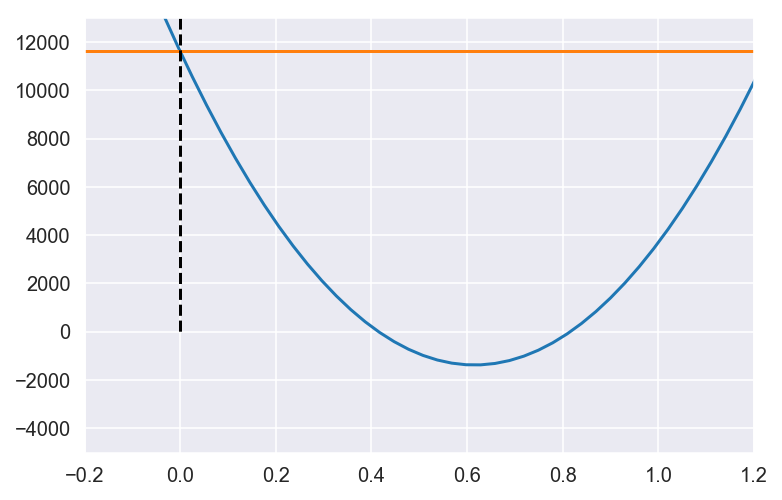

In [56]:
x1 = np.linspace(-1, 5, 200)
x1_2 = np.array([x ** 2 for x in x1])

y1 = np.array(sum_x2 * x1_2) - 2 * sum_xy * x1 + 11604
plt.plot(x1, y1)

plt.plot([-1,5],[11604, 11604])
plt.plot([0,0],[13000, 0], "--k")
plt.ylim(-5000, 13000)
plt.xlim(-0.2, 1.2)

α と β を同時に最小値をとる値をグラフ化。2変数2次曲線なので3D

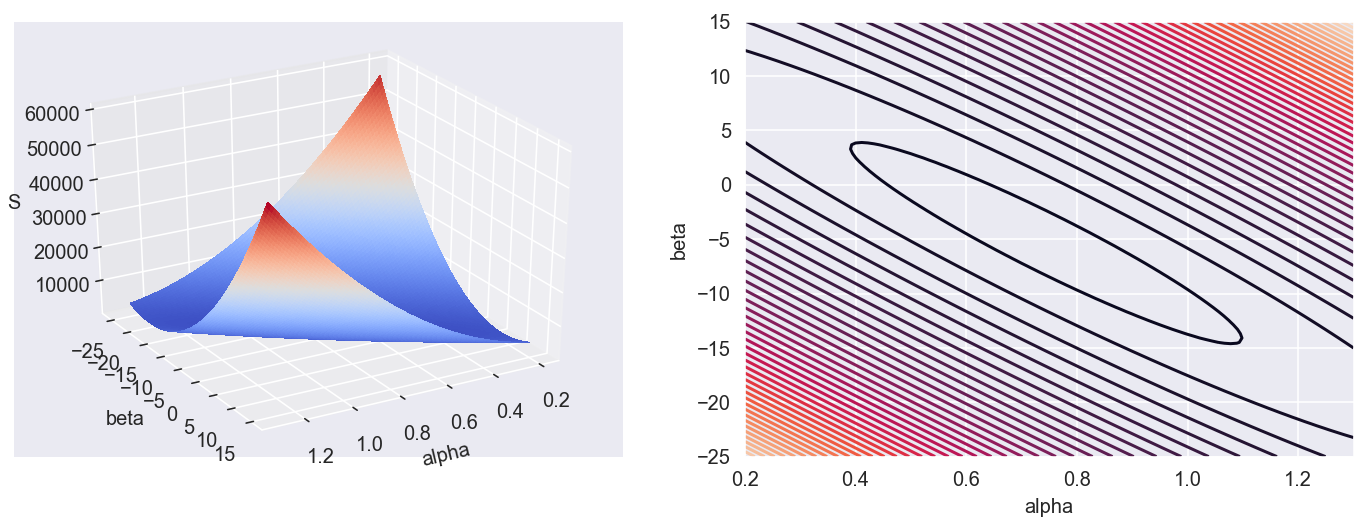

In [59]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# set field
X = np.linspace(0.2, 1.3, 100)
Y = np.linspace(-25, 15, 100)

# set data
#sum(x**2)
sum_x_2 = 34288.2988
#sum(y**2)
sum_y_2 = 11603.8684051
#dot(x,y)
sum_xy = 18884.194896
#sum(x)
sum_x = 1239.7
#sum(y)
sum_y = 655.0152
X, Y = np.meshgrid(X, Y)
#S(α,β)=34288α^2 + 50β^2 + 2480αβ − 37768α − 1310β + 11604
S = (sum_x_2 * (X**2)) + (50 * (Y**2)) + (2 * sum_x * X * Y) + (-2 * sum_xy  * X) + (-2 * sum_y * Y) + sum_y_2

# prepare plot
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121, projection='3d', azim=60)
ax.set_xlabel("alpha")
ax.set_ylabel("beta")
ax.set_zlabel("S")

# draw 3D graph
surf = ax.plot_surface(X, Y, S, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

# draw contour
ax = fig.add_subplot(122)
plt.contour(X,Y,S,50)
ax.set_xlabel("alpha")
ax.set_ylabel("beta")

plt.show()

ModuleNotFoundError: No module named 'moviepy'

## 正規分布

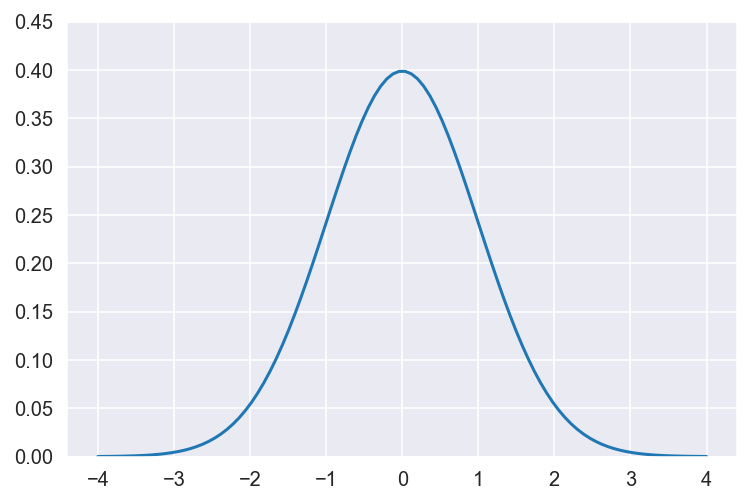

In [62]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)
y = (1 / np.sqrt(2 * np.pi))*np.exp(-x ** 2/ 2)

plt.ylim(0, 0.45)
plt.plot(x, y)
plt.show()

$ f(x) = x^2 $ を描画

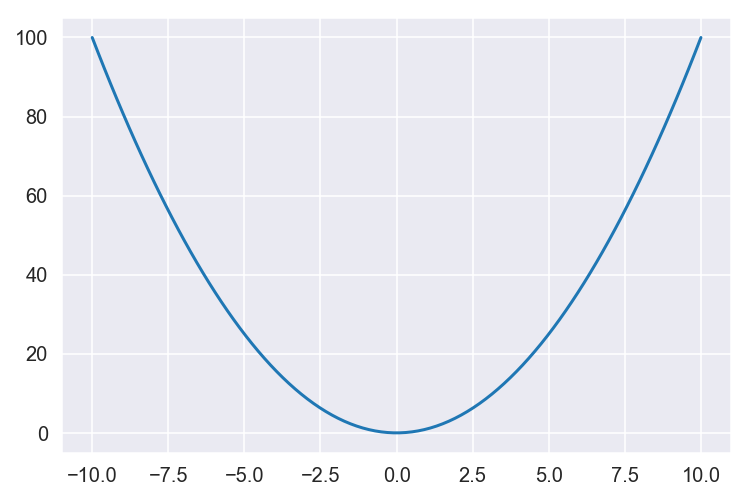

In [64]:
x = np.linspace(-10, 10, 100)
y = x ** 2
plt.plot(x, y)
plt.show()

$ f(x) = -x^2 $ を描画

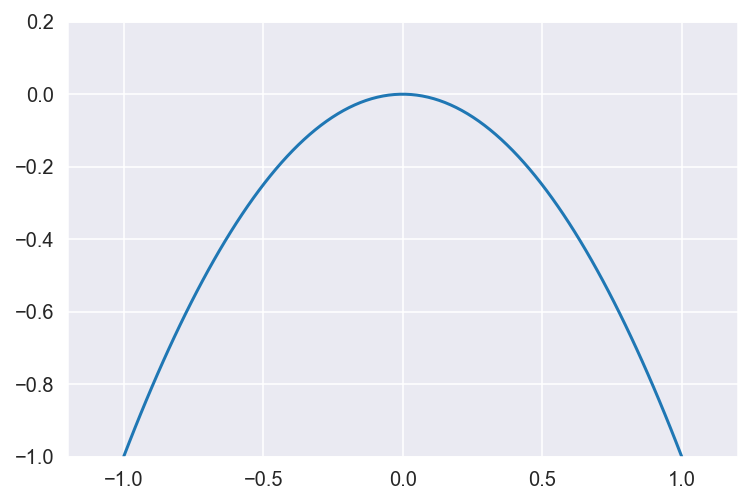

In [67]:
x = np.linspace(-1, 1, 100)
y = -x ** 2

plt.xlim(-1.2, 1.2), plt.ylim(-1, 0.2), plt.plot(x, y)
plt.show()

これを釣鐘型にする。
$$
    f(x) = e^{-x^2}
$$

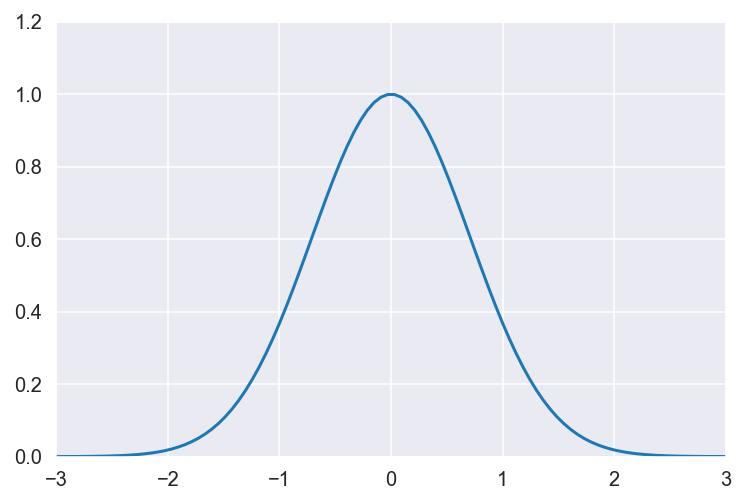

In [70]:
x = np.linspace(-3, 3, 100)
y = np.exp(-x**2)

plt.xlim(-3, 3), plt.ylim(0, 1.2)
plt.plot(x, y)
plt.show()

微分した時に計算しやすいように、$1/\sqrt{2}$倍する。つまり、$y=\sqrt{2}x$と変数変換する。<br/>
$$
    g(y) = exp(-\frac{y^2}{2})
$$

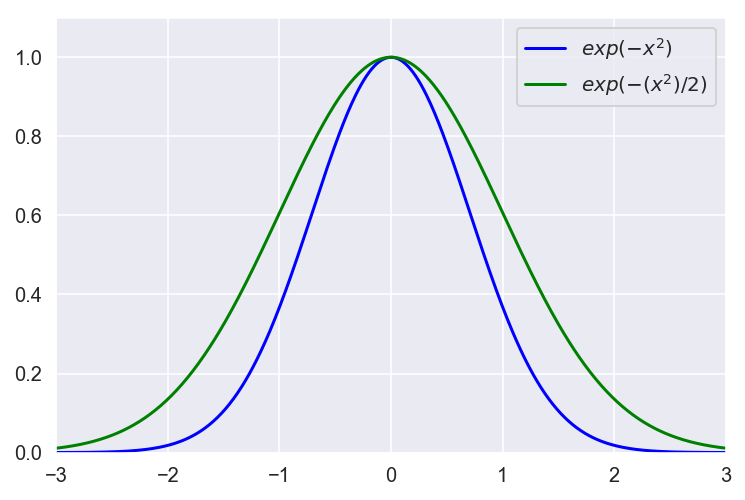

In [74]:
x = np.linspace(-3, 3, 500)
y1 = np.exp(-(x**2))
y2 = np.exp(-(x**2)/2)

plt.xlim(-3, 3), plt.ylim(0, 1.1)
plt.plot(x, y1, 'b', label='$exp(-x^2)$')
plt.plot(x, y2, 'g', label='$exp(-(x^2)/2)$')

plt.legend()
plt.show()

この$f(x)$の面積が1となるように（確率なので、すべて足したら100%）積分して 1 となる必要ある。